## Introduction and background

These notebooks describe how to undertake analyses introduced as examples in the
Ninth Edition of *Introduction to the Practice of Statistics* (2017) by Moore, McCabe, and Craig.
The data used in the notebooks are from the R version of the notebooks found at https://nhorton.people.amherst.edu/ips9/.

## Setup

First load the IPS (short for *Introduction to the Practice of Statistics*) package and dependencies:

In [1]:
(ql:quickload :ips)

To load "ips":
  Load 1 ASDF system:
    ips

; Loading "ips"
......

(:IPS)

In [2]:
(in-package :ips)

#<PACKAGE "IPS">

# Chapter 1: Looking at data &mdash; distributions

## 1.1 Key characteristics of a data set

## 1.2 Displaying distributions with graphs

### Categorical variables: Bar graphs and pie charts

The distribution of a categorical variable lists the categories and gives either the count or the percent of cases that fall in each category. An alternative to the percent is the proportion, the count divided by the sum of the counts. Note that the percent is simply the proportion times 100.

#### Example 1.7 The distribution of a categorical variable using a bar graph.

In example 1.7, the distribution of a categorical variable is examined along with a demonstration of the count of each catagory as a percentage of the total. The data set is the preferences for online information resources taken from a survey of 552 first year university students.

First, read the data into a data frame with the name 'online'. Note that we're not using the usual convention of \*earmuffs\* on the variable name.

In [3]:
(defparameter online (csv-to-data-frame (dex:get ips:eg01-07 :want-stream t)))

ONLINE

We can view the counts by typing the variable's name:

In [4]:
online

;; SOURCE    COUNT 
;; Google      406
;; Library      75
;; Wikipedia    52
;; Other        19

On page 10, figure 1.2 shows the data as a bar chart. We will create a Vega-Lite specification for this data:

In [5]:
(defparameter online-bar-chart (vglt:bar-chart online "SOURCE" "COUNT"))

ONLINE-BAR-CHART

and plot it:

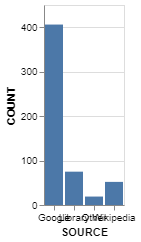

In [6]:
(plot online-bar-chart)

We can see that the source labels are overlapping. Let's fix this by adding a width setting:

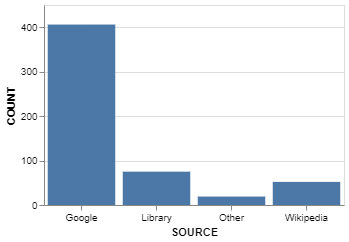

In [7]:
(plot (pushnew '("width" . 300) online-bar-chart))

You should always consider the best way to order the values in a bar chart. In this case, we will sort X
by the value of Y, decending:

In [8]:
(pushnew '("sort" . "-y") (accesses online-bar-chart :encoding :x))

(("sort" . "-y") ("field" . "SOURCE") ("type" . "nominal")
 ("axis" ("labelAngle" . 0)))

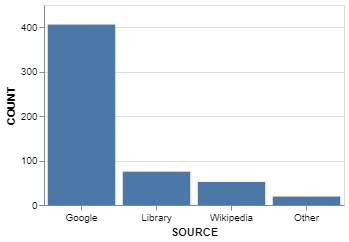

In [9]:
(plot online-bar-chart)

#### Example 1.10 Pie chart for the online resource preference data
Figure 1.3 (page 11) displays the same data in a pie chart. We can create a spec and plot the data as pie chart like this:

In [10]:
(defparameter online-pie-chart (vglt:pie-chart online "SOURCE" "COUNT"))

ONLINE-PIE-CHART

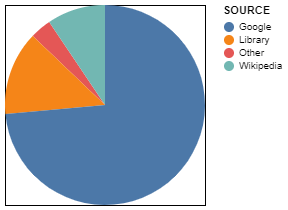

In [11]:
(plot online-pie-chart)

### Quantitative Variables: Stemplots and histograms
A _stemplot_ (stem-and-leaf plot) provides a quick graphical summary of the shape of a distribution. They are good for small data sets. For larger data sets, histograms work best.

#### Example 1.11 - Soluble corn fiber and calcium
This example show a stem-and-leaf plot of the effect of soluble corn fiber (SCF) on the absorption of calcium in adolescent boys and girls.

In [12]:
(defparameter scf (csv-to-data-frame (dex:get ips:eg01-11 :want-stream t)))

SCF

In [13]:
scf

;; ID TREATMENT ABSORPTION 
;;  1 Control           42
;;  2 Control           33
;;  3 Control           41
;;  4 Control           49
;;  5 Control           42
;;  6 Control           47
;;  7 Control           48
;;  8 Control           47
;;  9 Control           53
;; 10 Control           72
;; 11 Control           47
;; 12 Control           63
;; 13 Control           68
;; 14 Control           59
;; 15 Control           35
;; 16 Control           46
;; 17 Control           43
;; 18 Control           55
;; 19 Control           38
;; 20 Control           49
;; 21 Control           51
;; 22 Control           51
;; 23 Control           66
;; 24 SCF               50 ..